# Import Libraries

In [2]:
# main libraries
import os            # For file and directory management.
import pandas as pd  # For handling structured data in DataFrames.
import numpy as np   # For numerical computations.

# visualization libraries
import matplotlib.pyplot as plt      # For creating visualizations.
import seaborn as sns                # For statistical data visualization.
import missingno as msno             # To check null values existence.
from matplotlib.colors import LinearSegmentedColormap # To define custom colormaps with smooth color transitions.
from matplotlib.colors import ListedColormap          # For creating colormaps from a list of colors.
import warnings            # To manage warning messages.
from PIL import Image      # To handle image loading and manipulation.

# preprocessing libraries
import tensorflow as tf    # For building and training the model.
from sklearn.model_selection import train_test_split    # For splitting datasets.
from tensorflow.keras.utils import to_categorical       # To handle categorical data.
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # For encoding categorical labels into numeric format.

# Model libraries
from tensorflow.keras.models import Sequential          # For model architecture.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, Add, GlobalAveragePooling2D , Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau   # To optimize model training
from tensorflow.keras import regularizers         # For adding regularization to prevent overfittin
import albumentations as A                        # For image augmentation
from collections import Counter                   # To count the occurrences of labels in the dataset.
from tensorflow.keras.regularizers import l2      # To add L2 weight regularization to layers.
from tensorflow.keras.models import Model

# evaluation libraries
from sklearn.metrics import classification_report , confusion_matrix    # For displaying the model evaluation report
from sklearn.metrics import precision_score, recall_score, f1_score     # To assess the performance of the model

C:\Users\swadh\venv\Lib\site-packages\albumentations\check_version.py:147: UserWarning: Error fetching version info <urlopen error [Errno 11001] getaddrinfo failed>
  data = fetch_version_info()


# Read Data

In [3]:
# Loading the CSV file into a pandas DataFrame.
imgdata = pd.read_csv(r"C:\Users\swadh\OneDrive\Pictures\OneDrive\Desktop\skin cancer web\Skin_Cancer_Classification_Web_Using_DeepLearning-master\hmnist_28_28_RGB.csv")
imgdata

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            197        154        185        202  ...        173        124   
1            123         93        126        158  ...         60         39   
2            201        142        160        206  ...        167        129   
3            143        103        119        171  ...         44         26   
4            215        162        191        225  ...        209        166   
...          ...        ...        ...        ...  ...        ...        ...   
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            138        183        147        166        185        154   
1             55         25         14         28         25         14   
2            143        159        124        142        136        104   
3             36         25         12         17         25         12   
4            185        172        135        149        109         78   
...          ...        ...        ...        ...        ...        ...   
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
0            177      2  
1             27      2  
2            117      2  
3             15      2  
4             92      2  
...          ...    ...  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[10015 rows x 2353 columns]

In [4]:
# Reading the metadata CSV file into a pandas DataFrame.
fdata = pd.read_csv(r"C:\Users\swadh\OneDrive\Pictures\OneDrive\Desktop\skin cancer web\Skin_Cancer_Classification_Web_Using_DeepLearning-master\HAM10000_metadata.csv")
fdata

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [5]:
# Display the frequency of unique values in the 'dx' column of the `fdata` DataFrame.
print(fdata['dx'].value_counts())

# Display the frequency of unique values in the 'label' column of the `imgdata` DataFrame.
print(imgdata['label'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64
label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64


In [6]:
# Displaying a concise summary of the dataset.
# The output includes the following information:
# 1. Column names and their data types (e.g., int, float, object).
# 2. Non-null counts for each column, which helps in identifying missing data.
# 3. Memory usage of the DataFrame.
# This is for understanding the structure of the dataset and preparing for preprocessing.
print(fdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


**Comments:**
 1. The dataset contains 10015 instances.
 2. There are null values in "age" column.
 3. All columns are Categorical except "age" Column.

In [7]:
# To check if there is at least one missing value in each column.
# This outputs a Series where the index corresponds to the column names, and the values are True (if the column has missing data) or False (if it doesn't).
fdata.isna().any()

lesion_id       False
image_id        False
dx              False
dx_type         False
age              True
sex             False
localization    False
dtype: bool

<Axes: >

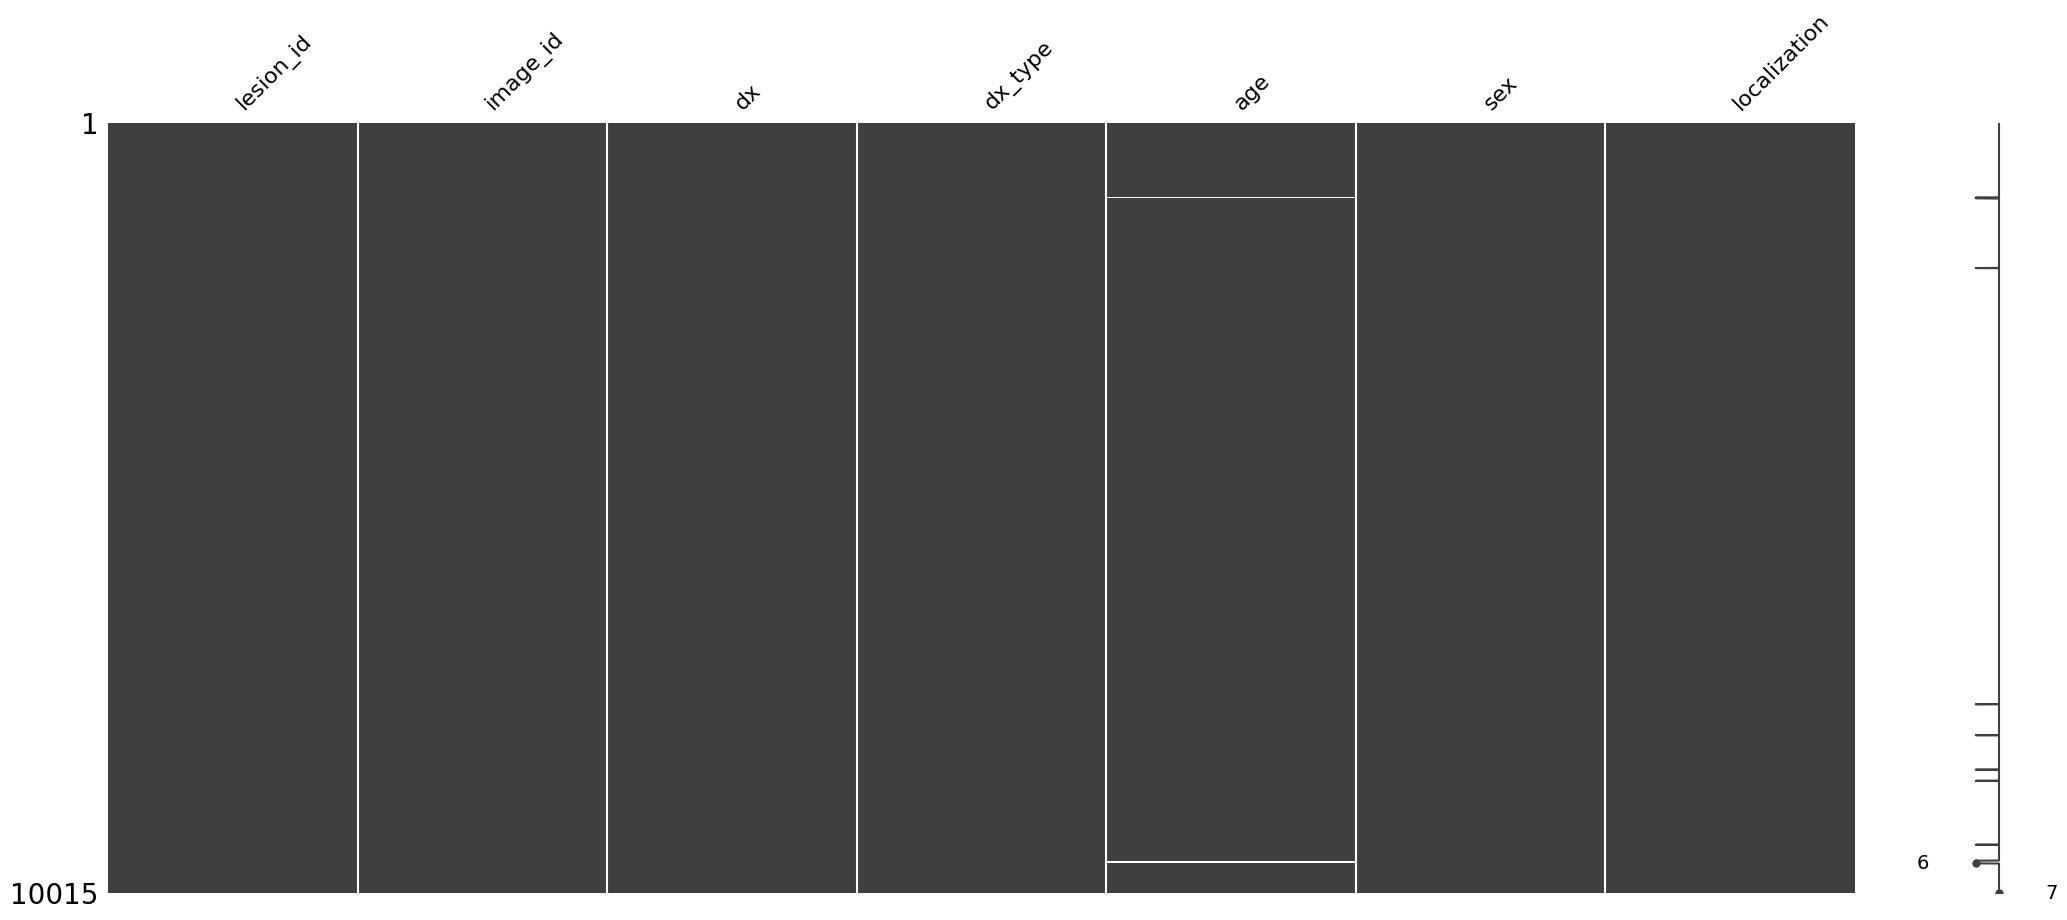

In [8]:
# Create a visualizing matrix plot to display the missing data in the dataset.
# show a heatmap-like representation where:
# - Each row corresponds to a record (e.g., data point) in the dataset.
# - Each column represents a feature (e.g., a column in the dataset).
# - White gaps indicate missing values, making it easy to spot incomplete data.
msno.matrix(fdata)

# Exploratory Data Analysis (EDA)

**We need to answer the following questions:**
  1. What is the frequency of different lesion types present in the dataset?
  2. What is the type of the distribution of lesion localization across various anatomical sites?
  3. What is the proportion of patients according to the gender?
  4. How are patients distributed according to the age?

C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\4200213585.py:31: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data,y='localization',ax=axes[0, 1],palette=custom_palette[:len(data['localization'].unique())],order=data['localization'].value_counts().index)


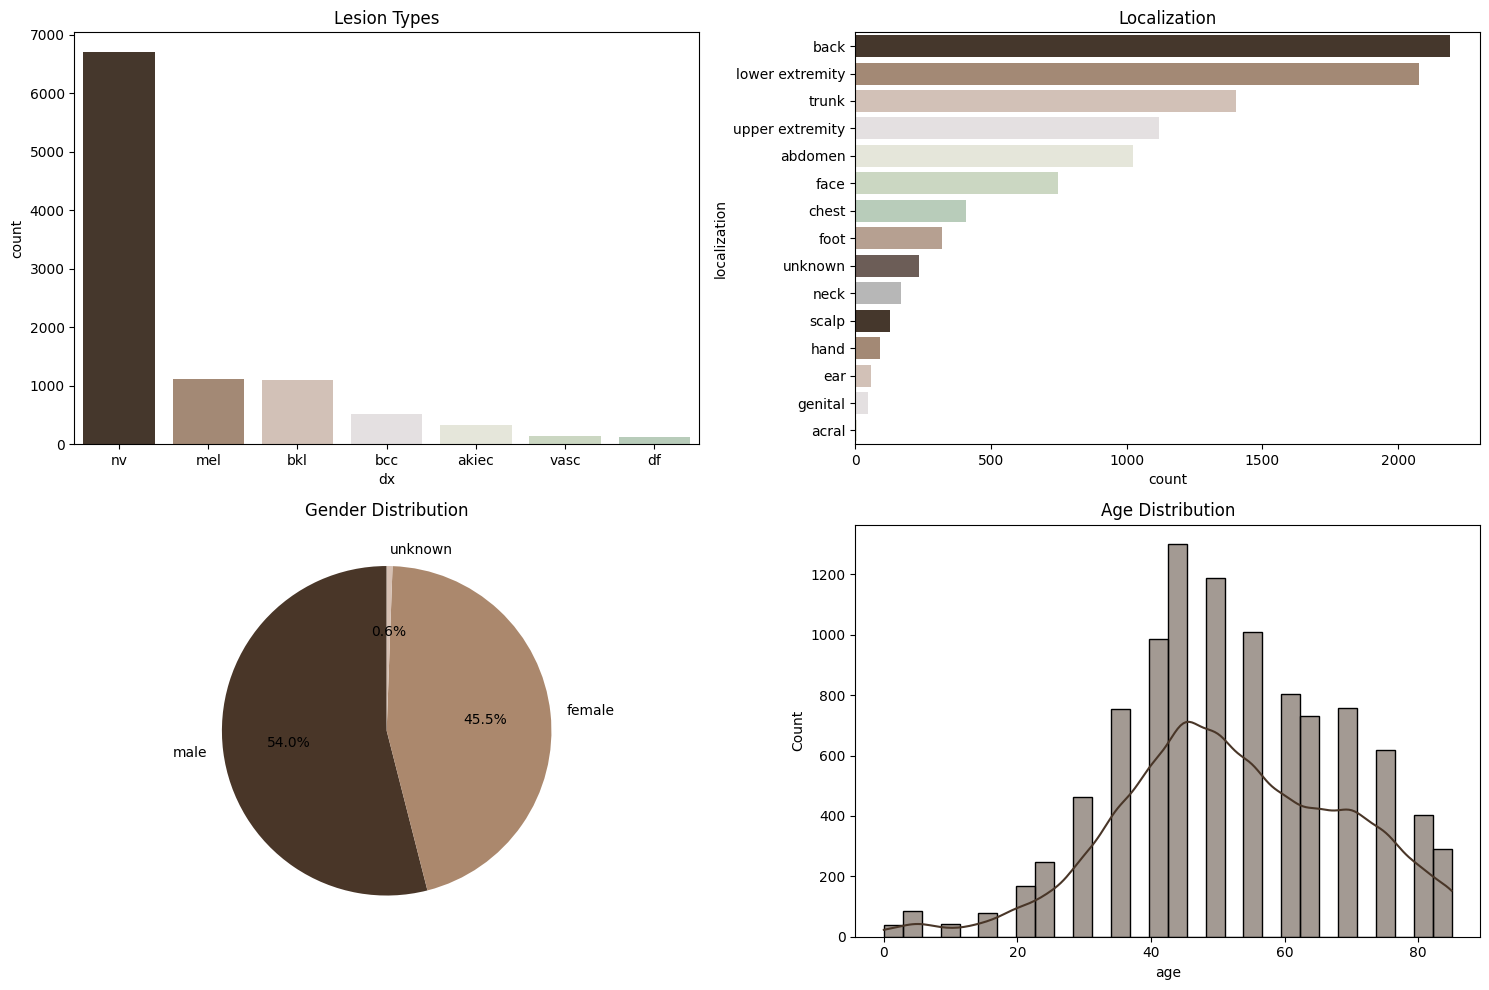

In [9]:
# - Ignoring FutureWarnings to ensure cleaner outputs during development.
warnings.filterwarnings("ignore", category=FutureWarning)
data = fdata
# Ensures the use of infinity values is not treated as NaN (Not a Number) when working with datasets.
pd.options.mode.use_inf_as_na = False

# Defining a custom color palette for visualizations:
custom_palette = ['#493628', '#AB886D', '#D6C0B3', '#E4E0E1', '#E7E8D8','#CADABF', '#B5CFB7', '#BC9F8B', '#705C53', '#B7B7B7']

# Creating a grid of subplots with a figure size of 15x10 inches:
# The grid has 2 rows and 2 columns, allowing space for multiple visualizations.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# count plot to visualize the distribution of lesion types:
# - Data: `data` DataFrame, expected to have a column 'dx' containing lesion type labels.
# - x='dx': Specifies that the x-axis represents lesion types.
# - ax=axes[0, 0]: Places the plot in the first subplot (top-left corner in this case).
# - palette=custom_palette: Applies the defined color palette for better aesthetics.
# - order=data['dx'].value_counts().index: Ensures the lesion types are displayed in descending order of frequency.
sns.countplot(data=data, x='dx', ax=axes[0, 0],palette=custom_palette[:len(data['dx'].unique())],order=data['dx'].value_counts().index)

#--------------------------------------------------------------------------------------------------------------------------------------------

# Count plot for the count of different lesion localizations in the dataset.
# - sns.countplot: Creates a bar plot for categorical data.
# - data=data: Specifies the dataset to be used.
# - y='localization': Indicates the column representing lesion localization to be plotted along the y-axis.
# - ax=axes[0, 1]: Specifies the subplot location in a grid of plots (top-right corner in this case).
# - palette=custom_palette[:len(data['localization'].unique())]: Sets a custom color palette, with unique colors corresponding to the number of unique localization categories.
# - order=data['localization'].value_counts().index: Orders the categories by their count in descending order.
sns.countplot(data=data,y='localization',ax=axes[0, 1],palette=custom_palette[:len(data['localization'].unique())],order=data['localization'].value_counts().index)

#--------------------------------------------------------------------------------------------------------------------------------------------
# This pie chart shows the distribution of gender in the dataset.
gender_counts = data['sex'].value_counts()     # - data['sex'].value_counts(): Counts the occurrences of each gender in the dataset.

# - labels=gender_counts.index: Sets the pie chart labels as the unique genders.
# - autopct='%1.1f%%': Displays the percentage distribution with one decimal place.
# - startangle=90: Starts the pie chart at 90 degrees for better orientation.
# - colors=custom_palette[:len(gender_counts)]: Uses the custom palette for consistent coloring.
axes[1, 0].pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=90,colors=custom_palette[:len(gender_counts)])
axes[1, 0].set_title('Gender Distribution')   # - set_title('Gender Distribution'): Sets the title of the subplot.
#--------------------------------------------------------------------------------------------------------------------------------------------
# This histogram is for the distribution of patients' ages.
# - sns.histplot(): Plots the histogram for numerical data.
# - data['age']: Specifies the age column from the dataset.
# - ax=axes[1, 1]: Specifies the subplot location in a grid of plots (bottom-right corner).
# - kde=True: Adds a Kernel Density Estimate (KDE) curve for a smooth representation of the data distribution.
# - bins=30: Divides the data range into 30 intervals for the histogram.
# - color=custom_palette[0]: Sets the bar color to the first color in the custom palette.
sns.histplot(data['age'],ax=axes[1, 1],kde=True,bins=30,color=custom_palette[0])

#------------------------------------------------------------------------------------------------------------------------------------------
# Setting titles for subplots to provide context to each visualization:
# The first subplot (top-left, indexed as [0, 0]) is titled 'Lesion Types'
axes[0, 0].set_title('Lesion Types')

# The second subplot (top-right, indexed as [0, 1]) is titled 'Localization',
axes[0, 1].set_title('Localization')

# The third subplot (bottom-right, indexed as [1, 1]) is titled 'Age Distribution',
axes[1, 1].set_title('Age Distribution')

# Adjusting subplot spacing to ensure that titles and content are displayed without overlap.
plt.tight_layout()
plt.show()  # Displaying the plots.

**We need to answer the following question:**
 1. How does age vary across different lesion types? And are there outliers or not?
 2. How is the distribution of diagnosis based on gender?
 3. What is the common diagnosis in each gender?
 4. How are lesion types distributed across body locations?
 5. How many are diagnosis methods used for each lesion type? or How are methods more commonly used for specific 
    diagnosis?

C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\3779571497.py:13: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='dx', y='age', data=df, palette=beige_brown_palette, ax=axes[0, 0])
C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\3779571497.py:19: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='dx', hue='sex', data=df, palette=beige_brown_palette, ax=axes[0, 1])
C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\3779571497.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)  # Rotate x-axis labels for better visibility.


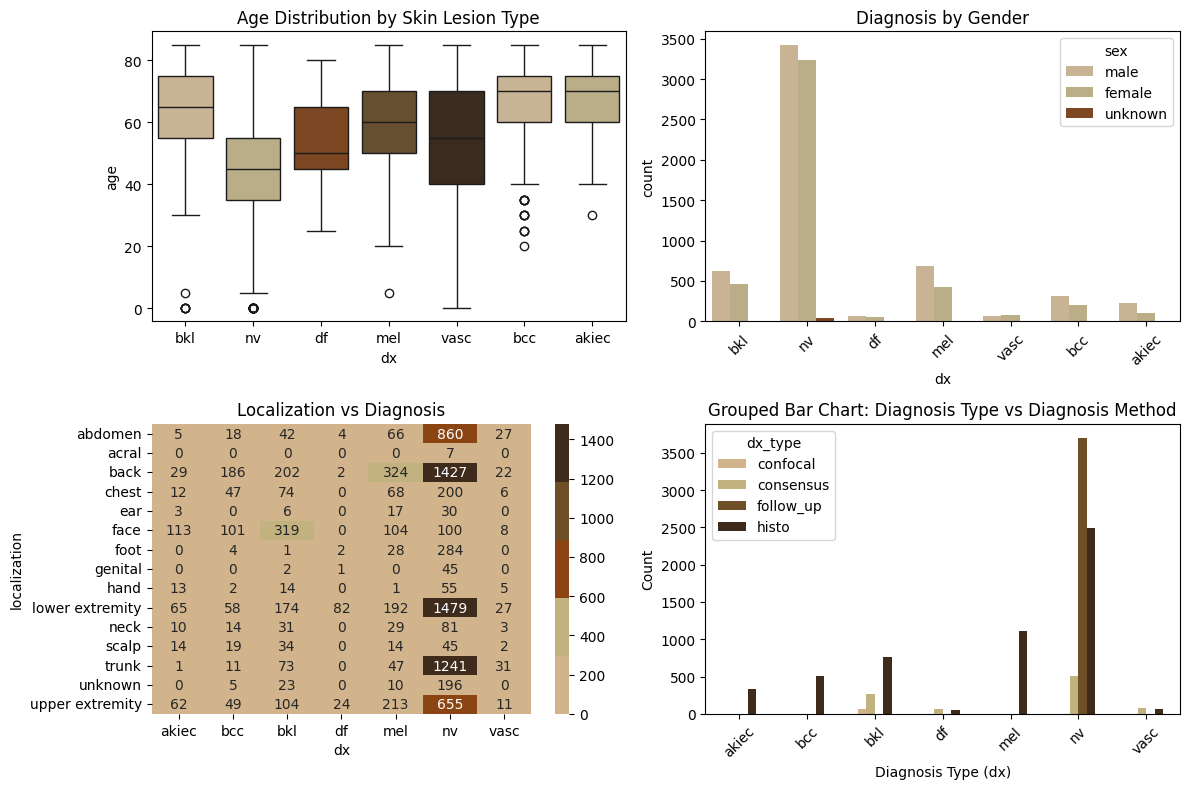

In [10]:
# Define a custom color palette with of beige and brown for visual consistency in plots.
beige_brown_palette = ["#D2B48C", "#C2B280", "#8B4513", "#6F4F28", "#3E2B1B"]
df= data
# Create a figure with a grid of subplots (2 rows and 2 columns) for multiple visualizations.
# The figure size is set to (15, 10) for better readability.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Boxplot for the age distribution across different types of skin lesions.
# - 'dx' represents the diagnosis type (e.g., melanoma, benign, etc.).
# - 'age' is the dependent variable.
# - The custom palette is applied for enhancing appearance.
# - The plot is placed in the first subplot (top-left)
sns.boxplot(x='dx', y='age', data=df, palette=beige_brown_palette, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Skin Lesion Type')   # Setting the title for the subplot.

# Plot 2: Countplot to show the frequency of diagnoses by gender.
# - 'dx' is the x-axis, and gender ('sex') is used as the hue to differentiate groups.
# - Custom palette is applied, and the plot is placed in the top-right subplot.
sns.countplot(x='dx', hue='sex', data=df, palette=beige_brown_palette, ax=axes[0, 1])
axes[0, 1].set_title('Diagnosis by Gender')  # Set the title for the plot.
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)  # Rotate x-axis labels for better visibility.

# Plot 3: Heatmap to show the relationship between lesion localization and diagnosis type.
# - A crosstab table is created to aggregate the data, and annotations are added to the heatmap for clarity.
# - A custom colormap is derived from the beige-brown palette.
# - The plot is placed in the bottom-left subplot.
cmap = ListedColormap(beige_brown_palette)  # Create a colormap for the heatmap.
sns.heatmap(pd.crosstab(df['localization'], df['dx']), annot=True, fmt="d", cmap=cmap, ax=axes[1, 0])
axes[1, 0].set_title('Localization vs Diagnosis')  # Set the title for the plot.

# Plot 4: Grouped bar chart to show the count of diagnosis types vs diagnosis methods.
# - A pivot table is created to summarize the data for plotting.
# - 'dx' is used as the x-axis, and the pivot table values are grouped and plotted.
# - The custom colormap is applied, and the plot is placed in the bottom-right subplot.
pivot = df.pivot_table(index='dx', columns='dx_type', aggfunc='size', fill_value=0)  # Create a pivot table.
pivot = pivot.reset_index()  # Reset the index for compatibility with plotting.

pivot.plot(x='dx', kind='bar', figsize=(12, 8), colormap=cmap, ax=axes[1, 1])   # Plot as a bar chart.
axes[1, 1].set_title('Grouped Bar Chart: Diagnosis Type vs Diagnosis Method')   # Set the title for the plot.
axes[1, 1].set_ylabel('Count')  # Label the y-axis.
axes[1, 1].set_xlabel('Diagnosis Type (dx)')   # Label the x-axis.
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)  # Rotate x-axis labels for better visibility.

plt.tight_layout()  # Adjust the layout to prevent overlapping of subplots.
plt.show()  # Display all the plots.

## Displaying five randomly selected images from each diagnosis.

In [11]:
# Displaying summary statistics for the DataFrame 'fdata', including count, mean, standard deviation, min, and max for each numerical column
fdata.describe()

age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

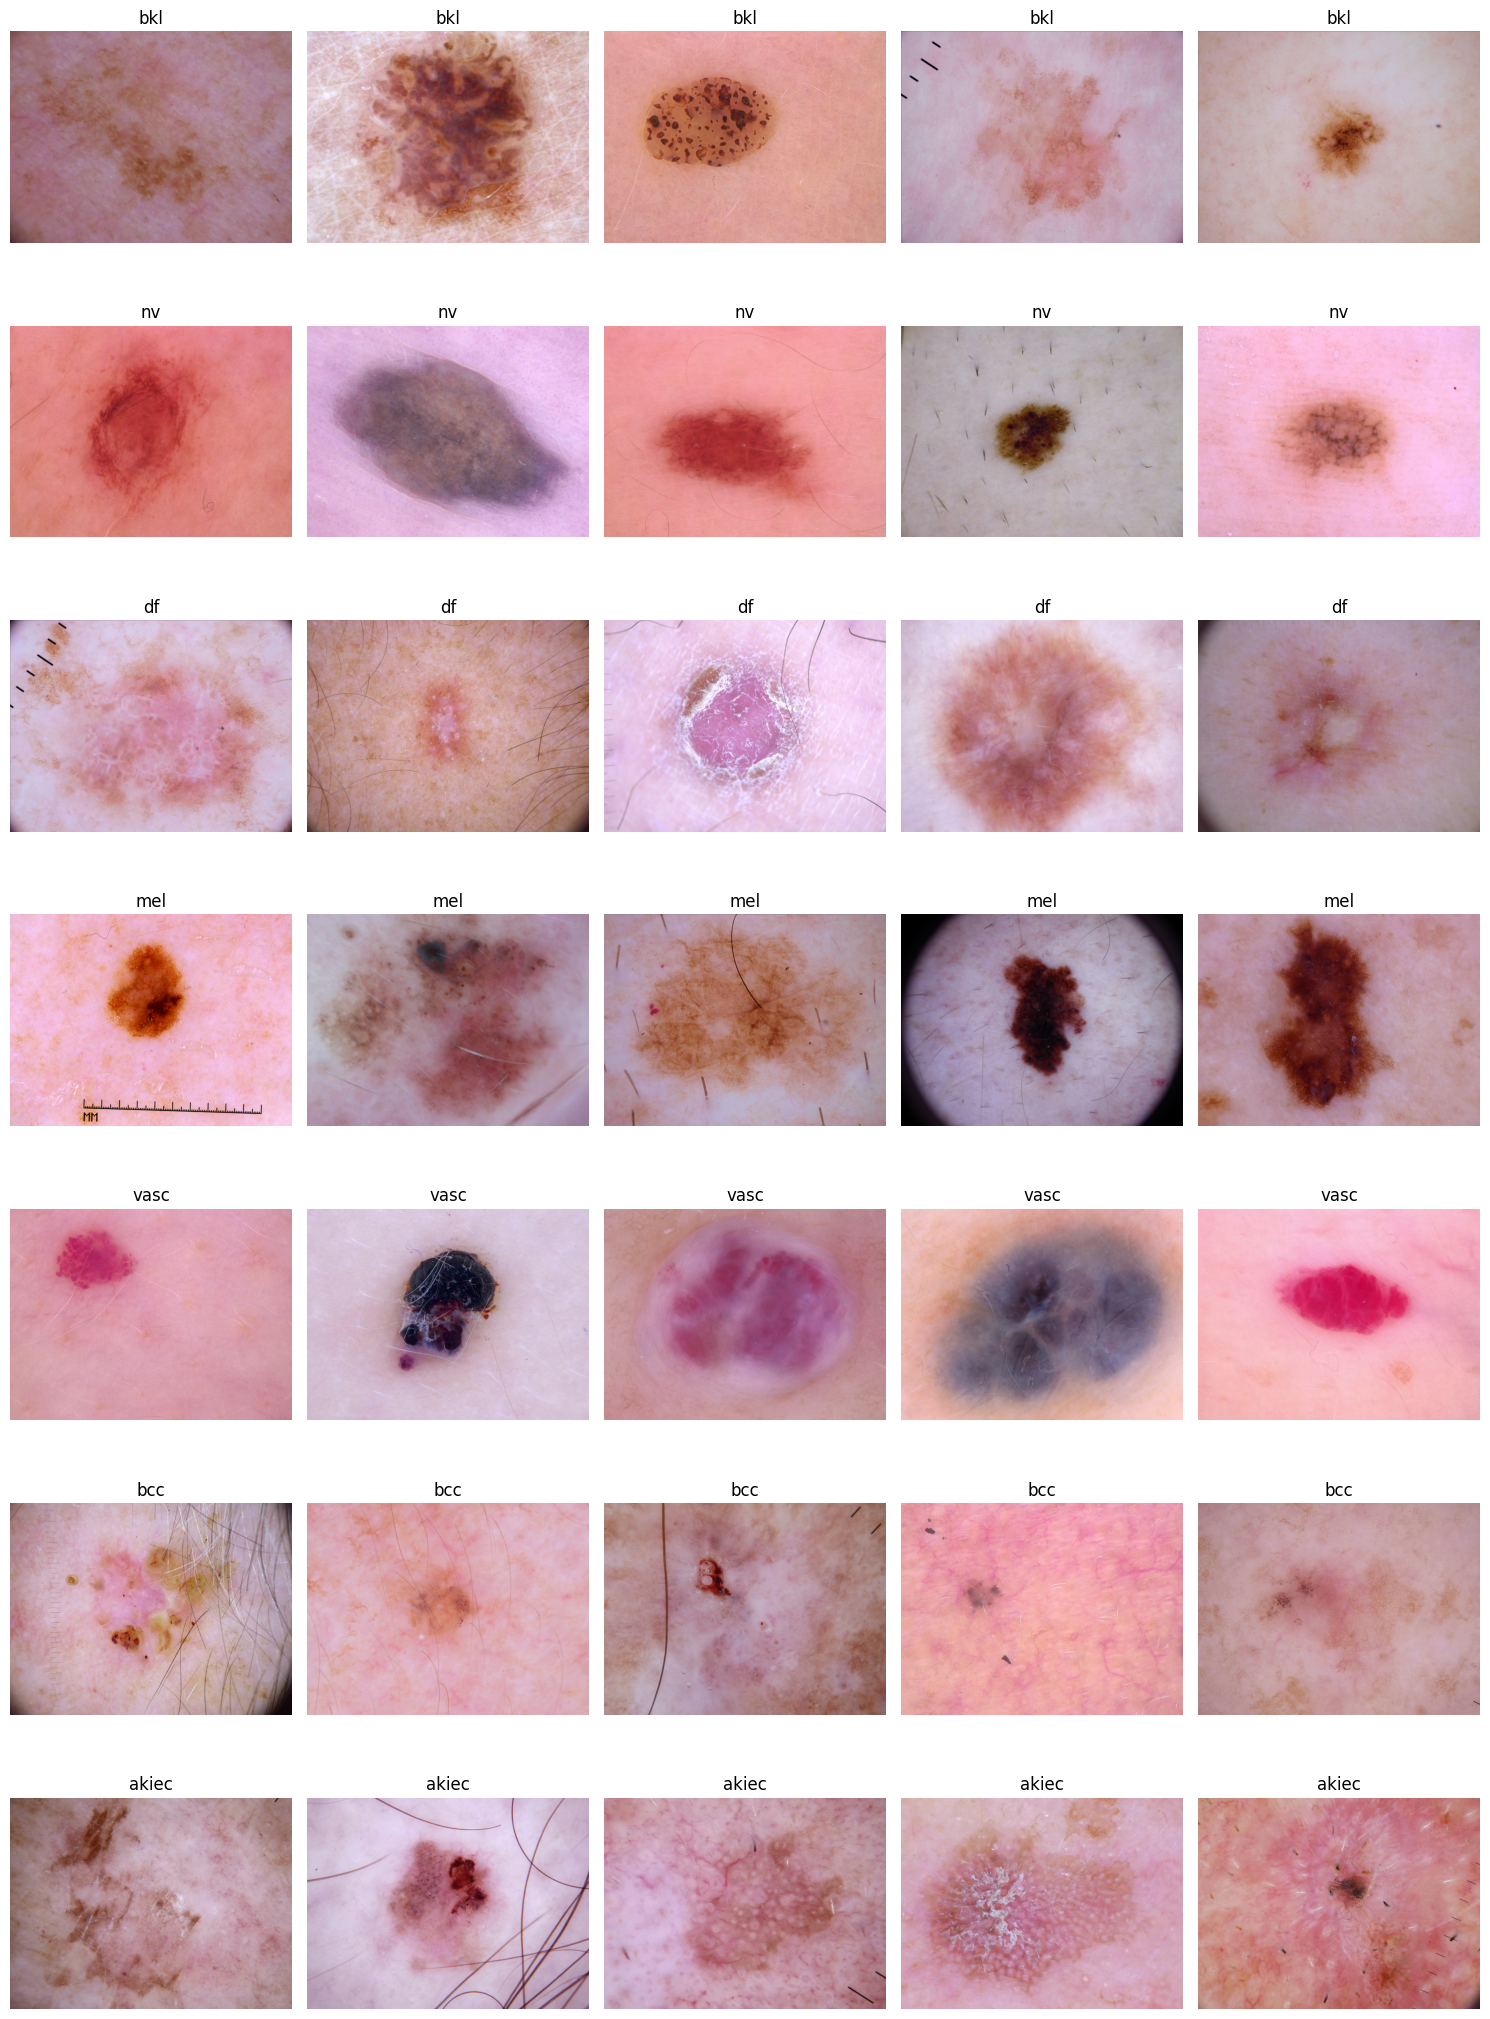

In [12]:
# Defining paths to the two parts of the image dataset and the metadata file.
images_path_1 = r"C:\Users\swadh\OneDrive\Pictures\OneDrive\Desktop\skin cancer web\Skin_Cancer_Classification_Web_Using_DeepLearning-master\HAM10000_images_part_1"
images_path_2 = r"C:\Users\swadh\OneDrive\Pictures\OneDrive\Desktop\skin cancer web\Skin_Cancer_Classification_Web_Using_DeepLearning-master\HAM10000_images_part_2"
metadata_path = r"C:\Users\swadh\OneDrive\Pictures\OneDrive\Desktop\skin cancer web\Skin_Cancer_Classification_Web_Using_DeepLearning-master\HAM10000_metadata.csv"

df = pd.read_csv(metadata_path)

# Adding a new column 'image_path' to the DataFrame that contains the full path to the corresponding image file by:
# - Checking if the image exists in 'images_path_1'.
# - If not, it assigns the path from 'images_path_2'.
df['image_path'] = df['image_id'].apply(
    lambda x: os.path.join(images_path_1, x + '.jpg') if os.path.exists(os.path.join(images_path_1, x + '.jpg')) 
    else os.path.join(images_path_2, x + '.jpg')
)

# Extracting the unique categories (diagnosis labels) from the dataset.
# The 'dx' column in the metadata contains the labels.
categories = df['dx'].unique()
num_samples = 5  # Defining the number of sample images to display per category.
# Creating a grid of subplots to display sample images from each category.
# The number of rows is equal to the number of categories, and each row has 'num_samples' images.
fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 3 * len(categories)))

# Iterating over each category to display sample images.
for i, category in enumerate(categories):
    # Randomly sampling 'num_samples' images from the current category.
    category_images = df[df['dx'] == category].sample(num_samples)

    # Iterating over the sampled images to display them in the corresponding subplot.
    for j, image_path in enumerate(category_images['image_path']):        
        img = Image.open(image_path)   # Loading the image from the file path.
        axes[i, j].imshow(img)         # Displaying the image in the corresponding subplot.
        axes[i, j].set_title(category) # Setting the title of the subplot to the category label.
        axes[i, j].axis('off')         # Removing axis ticks for a cleaner display.

plt.tight_layout()   # Adjusting the layout to prevent overlapping of subplots.
plt.show()           # Displaying the grid of images.

## Displaying five randomly selected images from the dataset, categorized by gender.

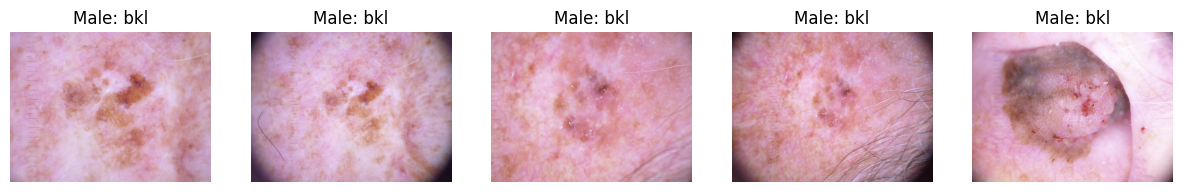

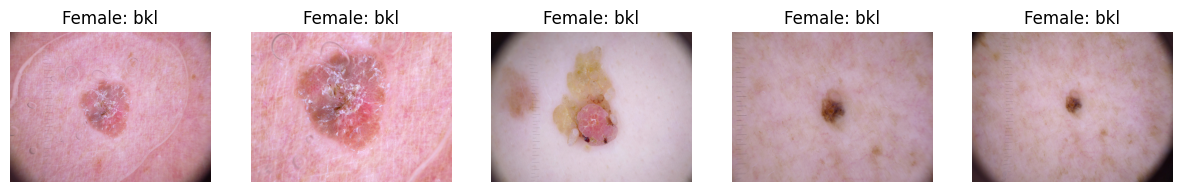

In [13]:
# Filtering the dataset to separate images based on the 'sex' column.
# The variable 'males' contains rows where the 'sex' column is 'male'.
# The variable 'females' contains rows where the 'sex' column is 'female'.
males = df[df['sex'] == 'male'] 
females = df[df['sex'] == 'female']  

# Visualizing 5 images of male subjects from the dataset.
plt.figure(figsize=(15, 5)) # Setting the figure size for better visualization.

# Looping through the first 5 male entries.
for i in range(5):  
    image_path = males.iloc[i]['image_path']  # Extracting the image path for each male subject.
    image = Image.open(image_path)   # Opening the image using PIL Library. 
    plt.subplot(1, 5, i + 1)         # Creating a subplot for each image (1 row, 5 columns).
    plt.imshow(image)  # Displaying the image.
    plt.axis('off')    # Hiding the axes for a cleaner look.
    plt.title(f'Male: {males.iloc[i]["dx"]}') # Setting the title with the diagnosis ('dx') for each image.
plt.show()    # Displaying the figure.

# Visualizing 5 images of female subjects from the dataset.
plt.figure(figsize=(15, 5))  # Setting the figure size for better visualization.
for i in range(5):   # Looping through the first 5 female entries.
    image_path = females.iloc[i]['image_path']    # Extracting the image path for each female subject.
    image = Image.open(image_path)  # Opening the image using PIL Library.
    plt.subplot(1, 5, i + 1)   # Creating a subplot for each image (1 row, 5 columns).
    plt.imshow(image)   # Displaying the image.
    plt.axis('off')     # Hiding the axes for a cleaner look.
    plt.title(f'Female: {females.iloc[i]["dx"]}') # Setting the title with the diagnosis ('dx') for each image.
plt.show()    # Displaying the figure.

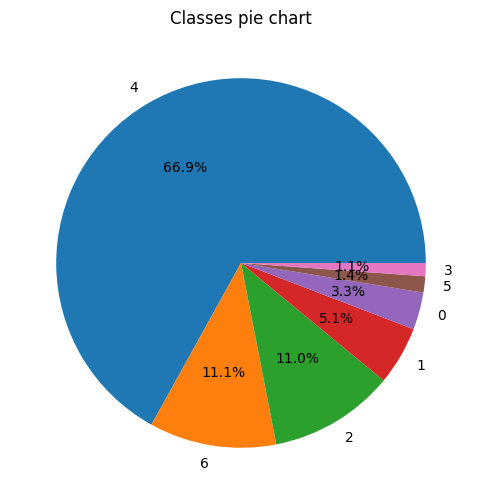

In [14]:
# Visualizing the class distribution using a pie chart
# Create a figure with a size of 6x6 inches.
plt.figure(figsize=(6, 6))

# Plot a pie chart using the counts of each label from the 'label' column in the imgdata DataFrame.
# Display percentages on the chart with one decimal point for each slice.
plt.pie(imgdata['label'].value_counts().values , labels=imgdata['label'].value_counts().index ,autopct='%1.1f%%')
plt.title('Classes pie chart')    # Add a title to the chart: "Classes pie chart".
plt.show()   # Show the chart

# Preprocessing

In [15]:
# drop unnececcary columns
fdata = fdata.drop(columns = ['lesion_id' , 'image_id' ,'dx'] , axis =1)
fdata.head()    # Display the first rows

dx_type   age   sex localization
0   histo  80.0  male        scalp
1   histo  80.0  male        scalp
2   histo  80.0  male        scalp
3   histo  80.0  male        scalp
4   histo  75.0  male          ear

In [16]:
# fill nulls in age columns using its mean value
fdata['age'] = fdata['age'].fillna(51)

# Split

In [17]:
# split to features & target
y = imgdata['label']

In [18]:
# drop target column to isolate the feature data
imgs = imgdata.drop(columns = ['label'] , axis =1)

In [19]:
# concatenate pixels value with row data
data = pd.concat([fdata, pd.DataFrame(imgs)], axis=1)
data

dx_type   age     sex localization  pixel0000  pixel0001  pixel0002  \
0       histo  80.0    male        scalp        192        153        193   
1       histo  80.0    male        scalp         25         14         30   
2       histo  80.0    male        scalp        192        138        153   
3       histo  80.0    male        scalp         38         19         30   
4       histo  75.0    male          ear        158        113        139   
...       ...   ...     ...          ...        ...        ...        ...   
10010   histo  40.0    male      abdomen        183        165        181   
10011   histo  40.0    male      abdomen          2          3          1   
10012   histo  40.0    male      abdomen        132        118        118   
10013   histo  80.0    male         face        160        124        146   
10014   histo  70.0  female         back        175        142        121   

       pixel0003  pixel0004  pixel0005  ...  pixel2342  pixel2343  pixel2344  \
0            195        155        192  ...        134        173        124   
1             68         48         75  ...         82         60         39   
2            200        145        163  ...        149        167        129   
3             95         59         72  ...         73         44         26   
4            194        144        174  ...        201        209        166   
...          ...        ...        ...  ...        ...        ...        ...   
10010        182        165        180  ...        181        208        185   
10011         38         33         32  ...        129         96         79   
10012        167        149        149  ...        190        204        181   
10013        164        131        152  ...        165        185        162   
10014        181        150        134  ...         48        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            138        183        147        166        185        154   
1             55         25         14         28         25         14   
2            143        159        124        142        136        104   
3             36         25         12         17         25         12   
4            185        172        135        149        109         78   
...          ...        ...        ...        ...        ...        ...   
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  
0            177  
1             27  
2            117  
3             15  
4             92  
...          ...  
10010        189  
10011          1  
10012        145  
10013        172  
10014        126  

[10015 rows x 2356 columns]

In [20]:
# Split the dataset into 80% training data and 20% testing data.
x_trainall, x_testall, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42, stratify=y)

# Split the training data into 80% training data and 20% validation sets.
x_trainall, x_valall, y_train, y_val = train_test_split(x_trainall, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [21]:
# Display the column names of the x_trainall DataFrame
x_trainall.columns

Index(['dx_type', 'age', 'sex', 'localization', 'pixel0000', 'pixel0001',
       'pixel0002', 'pixel0003', 'pixel0004', 'pixel0005',
       ...
       'pixel2342', 'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346',
       'pixel2347', 'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351'],
      dtype='object', length=2356)

In [22]:
# Display class distribution after splitting the dataset
print("\nClass distribution after splitting:")

# Print the distribution of classes in the training set
print("Training set distribution:")
print(y_train.value_counts().sort_index())

# Print the distribution of classes in the validation set
print("\nValidation set distribution:")
print(y_val.value_counts().sort_index())

# Print the distribution of classes in the test set
print("\nTest set distribution:")
print(y_test.value_counts().sort_index())

# Display the number of samples in each dataset (training, validation, test)
print("\nNumber of samples in each set:")  
print(f"Training: {len(y_train)}")         # Number of samples in the training set
print(f"Validation: {len(y_val)}")         # Number of samples in the validation set
print(f"Test: {len(y_test)}")              # Number of samples in the test set


Class distribution after splitting:
Training set distribution:
label
0     209
1     329
2     703
3      74
4    4291
5      91
6     712
Name: count, dtype: int64

Validation set distribution:
label
0      53
1      82
2     176
3      18
4    1073
5      23
6     178
Name: count, dtype: int64

Test set distribution:
label
0      65
1     103
2     220
3      23
4    1341
5      28
6     223
Name: count, dtype: int64

Number of samples in each set:
Training: 6409
Validation: 1603
Test: 2003


In [23]:
# Display the column names of the x_trainall DataFrame
x_trainall.columns

Index(['dx_type', 'age', 'sex', 'localization', 'pixel0000', 'pixel0001',
       'pixel0002', 'pixel0003', 'pixel0004', 'pixel0005',
       ...
       'pixel2342', 'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346',
       'pixel2347', 'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351'],
      dtype='object', length=2356)

In [24]:
# split into images and row data for training dataset

# Select specific columns from the dataset to create the 'x_train_tabilar' dataframe
x_train_tabilar = x_trainall[['dx_type', 'age', 'sex', 'localization']]

# Drop the selected columns from the original dataset to create 'x_train_imgs' containing only image data
x_train_imgs = x_trainall.drop(columns= ['dx_type', 'age', 'sex', 'localization'] , axis =1)
x_train_tabilar

dx_type   age     sex     localization
9276  consensus  60.0  female          abdomen
9863      histo  70.0    male  upper extremity
2188      histo  50.0    male  lower extremity
4558  follow_up  70.0  female            trunk
6709      histo  20.0    male             back
...         ...   ...     ...              ...
6791      histo  70.0    male  upper extremity
1531      histo  55.0    male             back
1673      histo  55.0  female  lower extremity
5010  follow_up  50.0  female            trunk
8292      histo  30.0  female  lower extremity

[6409 rows x 4 columns]

In [25]:
# Split into image and tabular data for validation test

# Extracting the tabular features (dx_type, age, sex, localization) from validation dataset
X_tabular_val = x_valall[['dx_type','age', 'sex' , 'localization']]

# Extracting the image features by removing the tabular columns from validation dataset
X_images_val = x_valall.drop(['dx_type','age', 'sex' , 'localization'], axis=1).values

# Extracting the target labels for validation set
y_train_val = y_val.values

In [26]:
# Split into image and tabular data for test dataset

# Extracting the tabular features (dx_type, age, sex, localization) from test dataset
X_tabular_test = x_testall[['dx_type','age', 'sex' , 'localization']]

# Extracting the image features by removing the tabular columns from testdataset
X_images_test = x_testall.drop(['dx_type','age', 'sex' , 'localization'], axis=1).values

# Extracting the target labels for test set
y_train_test = y_test.values

In [27]:
x_train_imgs

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
9276         57         39         56        119         92        110   
9863        154        109        104        157        113        105   
2188        162        150        153        164        152        151   
4558        234        145        163        235        147        169   
6709        202        200        213        206        204        218   
...         ...        ...        ...        ...        ...        ...   
6791        195        173        184        197        176        189   
1531          0          0          0          1          1          1   
1673        190        168        167        193        174        173   
5010        249        189        197        249        194        203   
8292        203        154        163        205        155        161   

      pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2342  pixel2343  \
9276        139        109        128        143  ...         60         10   
9863        163        116        116        168  ...        125        156   
2188        169        157        159        175  ...        166        166   
4558        235        146        168        236  ...        158        221   
6709        206        203        218        208  ...        220        207   
...         ...        ...        ...        ...  ...        ...        ...   
6791        193        169        179        194  ...        175        193   
1531          3          3          2          7  ...        167        174   
1673        201        183        184        205  ...        198        206   
5010        249        196        206        249  ...        194        248   
8292        207        154        156        208  ...        143        193   

      pixel2344  pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  \
9276          4         13          8          3          8         10   
9863        112        121        154        114        124        122   
2188        153        161        150        137        144        132   
4558        148        158        222        149        150        217   
6709        201        217        205        201        216        203   
...         ...        ...        ...        ...        ...        ...   
6791        173        171        194        175        168        194   
1531        157        167        129        109        121         38   
1673        189        188        203        186        185        196   
5010        190        191        248        189        190        245   
8292        142        148        196        147        159        193   

      pixel2350  pixel2351  
9276          3          8  
9863         85         93  
2188        116        117  
4558        146        148  
6709        199        214  
...         ...        ...  
6791        176        170  
1531         27         33  
1673        179        177  
5010        185        188  
8292        143        147  

[6409 rows x 2352 columns]

In [28]:
# show shape of images data
x_train_imgs.shape

(6409, 2352)

In [29]:
# Adding the target column to the dataset
tabular_data = x_train_tabilar
tabular_data['class'] = y_train.values
tabular_data

C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\3739540120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabular_data['class'] = y_train.values


dx_type   age     sex     localization  class
9276  consensus  60.0  female          abdomen      4
9863      histo  70.0    male  upper extremity      0
2188      histo  50.0    male  lower extremity      6
4558  follow_up  70.0  female            trunk      4
6709      histo  20.0    male             back      4
...         ...   ...     ...              ...    ...
6791      histo  70.0    male  upper extremity      4
1531      histo  55.0    male             back      6
1673      histo  55.0  female  lower extremity      6
5010  follow_up  50.0  female            trunk      4
8292      histo  30.0  female  lower extremity      4

[6409 rows x 5 columns]

In [30]:
# Ensure the similarity of the index
tabular_data.index == x_train_imgs.index

array([ True,  True,  True, ...,  True,  True,  True], shape=(6409,))

In [31]:
# reset index of two datasets
tabular_data = tabular_data.reset_index(drop=True)
x_train_imgs = x_train_imgs.reset_index(drop = True)


In [32]:
x_train_imgs

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            57         39         56        119         92        110   
1           154        109        104        157        113        105   
2           162        150        153        164        152        151   
3           234        145        163        235        147        169   
4           202        200        213        206        204        218   
...         ...        ...        ...        ...        ...        ...   
6404        195        173        184        197        176        189   
6405          0          0          0          1          1          1   
6406        190        168        167        193        174        173   
6407        249        189        197        249        194        203   
6408        203        154        163        205        155        161   

      pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2342  pixel2343  \
0           139        109        128        143  ...         60         10   
1           163        116        116        168  ...        125        156   
2           169        157        159        175  ...        166        166   
3           235        146        168        236  ...        158        221   
4           206        203        218        208  ...        220        207   
...         ...        ...        ...        ...  ...        ...        ...   
6404        193        169        179        194  ...        175        193   
6405          3          3          2          7  ...        167        174   
6406        201        183        184        205  ...        198        206   
6407        249        196        206        249  ...        194        248   
6408        207        154        156        208  ...        143        193   

      pixel2344  pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  \
0             4         13          8          3          8         10   
1           112        121        154        114        124        122   
2           153        161        150        137        144        132   
3           148        158        222        149        150        217   
4           201        217        205        201        216        203   
...         ...        ...        ...        ...        ...        ...   
6404        173        171        194        175        168        194   
6405        157        167        129        109        121         38   
6406        189        188        203        186        185        196   
6407        190        191        248        189        190        245   
6408        142        148        196        147        159        193   

      pixel2350  pixel2351  
0             3          8  
1            85         93  
2           116        117  
3           146        148  
4           199        214  
...         ...        ...  
6404        176        170  
6405         27         33  
6406        179        177  
6407        185        188  
6408        143        147  

[6409 rows x 2352 columns]

In [33]:
# Check the shape of the tabular_data
tabular_data.shape

(6409, 5)

In [34]:
# Check the shape of the x_train_imgs
x_train_imgs.shape

(6409, 2352)

# Handle Unbalanced

In [35]:
# oversampler = RandomOverSampler(random_state=42)


# # Apply oversampling
# x_train_resampled, y_train_resampled = oversampler.fit_resample(x_trainall, y_train)

In [36]:
def reshape_to_image(flat_data):
    """
    Reshapes flat data into image format (height, width, channels).

    Parameters:
    flat_data: numpy array or pandas DataFrame
        The flattened data to be reshaped.

    Returns:
    numpy array
        Reshaped image data.
    """
    if isinstance(flat_data, pd.DataFrame):          # Check if the input data is a Pandas DataFrame
        flat_data = flat_data.values                 # Convert the DataFrame to a NumPy array
    return flat_data.reshape(-1, 28, 28, 3)          # Reshape the data to have dimensions (n_samples, 28, 28, 3)


# A function to reshape image data back to flat format
def reshape_to_flat(image_data):
    """
    Reshapes image data into flat format.

    Parameters:
    image_data: numpy array
        The image data to be reshaped.

    Returns:
    numpy array
        Flattened image data.
    """
    return image_data.reshape(image_data.shape[0], -1)    # Reshaping the image_data array to flatten each image


# A function to create an augmentation pipeline
def create_augmentation_pipeline():
    """
    Creates a data augmentation pipeline using albumentations.

    Returns:
    albumentations.Compose
        The composed transformation pipeline.
    """  
    # Define the sequence of transformations
    # These transformations help enhance the dataset by generating diverse variations of images To improve generalization.
    transform = A.Compose([
        A.Rotate(limit=30, p=0.7),      # Randomly rotates the image within +30 or -30 degrees with a 70% probability.
        A.HorizontalFlip(p=0.5),        # Flips the image horizontally with a 50% probability.
        A.VerticalFlip(p=0.5),          # Flips the image vertically with a 50% probability.
        A.OneOf([                   # Randomly applies one of the noise addition techniques with a 20% probability.
            A.GaussNoise(p=1),          # Adds random Gaussian noise to the image.
            A.MultiplicativeNoise(p=1),   # Adds random multiplicative noise to the image.
        ], p=0.2),
        A.OneOf([                   # Randomly applies one of the blurring techniques with a 20% probability.
            A.MotionBlur(p=1),                 # Introduces motion blur to simulate the effect of movement.
            A.MedianBlur(blur_limit=3, p=1),   # Applies a median blur with a kernel size of up to 3.
            A.GaussianBlur(blur_limit=3, p=1),   # Applies a Gaussian blur with a kernel size of up to 3.
        ], p=0.2),
        A.ColorJitter(       # Adjusts image brightness, contrast, saturation, and hue within specified limits
                             # to simulate varying lighting conditions with a 70% probability.
            brightness=0.2,         # Adjusts brightness by +20% or -20%.
            contrast=0.2,           # Adjusts contrast by +20% or -20%.
            saturation=0.2,         # Adjusts saturation by +20% or -20%.
            hue=0.1,                # Adjusts hue by +10% or -10%.
            p=0.7
        ),
    ])
    return transform     # Returns the composed augmentation pipeline.

In [37]:
def augment_minority_classes(x_train, x_train_tabilar, y_train, target_samples=None):
 
    """
    Augments minority classes in the training dataset to balance class distributions.

    This function performs data augmentation on image data associated with minority classes 
    while preserving tabular data alignment. It increases the number of samples for each 
    class to match the size of the largest class or a specified target number of samples.

    Parameters:
    ----------
    x_train : pandas.DataFrame or numpy.ndarray
        The input training data containing image features, either as a flat DataFrame 
        or a NumPy array.
    
    x_train_tabilar : pandas.DataFrame
        The tabular data associated with each image sample.
    
    y_train : pandas.Series or numpy.ndarray
        The target labels for the training data.

    target_samples : int, optional
        The desired number of samples for each class. If not provided, the size of the 
        largest class is used.

    Returns:
    -------
    tuple
        A tuple containing:
        - x_aug (pandas.DataFrame): Augmented image data.
        - x_aug_row (pandas.DataFrame): Augmented tabular data.
        - y_aug (pandas.Series): Updated target labels.
"""
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
        
    # Count the number of samples for each class.
    class_counts = Counter(y_train)

    # If target_samples is not provided, set it to the number of samples in the largest class.
    if target_samples is None:       
        target_samples = max(class_counts.values())
        
    # Convert the training data into image format if needed.
    x_images = reshape_to_image(x_train)
    
    # Scale pixel values to 0-255 range if they are normalized (values <= 1.0).
    if x_images.max() <= 1.0:
        x_images = (x_images * 255).astype(np.uint8)
        
    # call the data augmentation pipeline to apply the required transformation.
    transform = create_augmentation_pipeline()

    # Initialize lists to store augmented images and their corresponding labels and row data.
    augmented_images = []
    augmented_rows = []
    augmented_labels = []

    for class_label in class_counts:    # Iterate over each class in the dataset.
        
        # Initialize lists to store augmented images and their corresponding labels.
        class_indices = np.where(y_train == class_label)[0]
        class_images = x_images[class_indices]
        class_rows = x_train_tabilar.iloc[class_indices]  # Use .iloc to preserve positional indexing

        # Determine the number of samples for the current class.
        n_samples = len(class_images)
        if n_samples < target_samples:        # If the class is underrepresented, generate additional samples by augmentation.
            n_augment = target_samples - n_samples         # Number of new samples to create.

            # Perform data augmentation until the desired number of samples is reached.
            for i in range(n_augment):
                idx = i % n_samples
                image = class_images[idx].astype(np.uint8)

                # Apply the augmentation pipeline to the current image.
                augmented = transform(image=image)
                augmented_image = augmented['image']

                # Add the augmented image and corresponding label to the lists.
                augmented_images.append(augmented_image)
                augmented_labels.append(class_label)

                # Append tabular data as a proper row (ensure it's a 1D array, not 2D or nested)
                augmented_rows.append(class_rows.iloc[idx].to_numpy())

    # Combine original and augmented data, if any new samples were generated.
    if augmented_images:
        
        # Convert augmented images and rows to DataFrames
        augmented_images_df = pd.DataFrame(
            reshape_to_flat(np.array(augmented_images)), 
            columns=x_train.columns if isinstance(x_train, pd.DataFrame) else None
        )
        # Ensure whether it is a DataFrame.
        augmented_rows_df = pd.DataFrame(
            augmented_rows, 
            columns=x_train_tabilar.columns if isinstance(x_train_tabilar, pd.DataFrame) else None
        )
        augmented_labels_series = pd.Series(augmented_labels, name="label")

        # Concatenate the original and augmented data
        x_aug = pd.concat([x_train, augmented_images_df], ignore_index=True)
        x_aug_row = pd.concat([x_train_tabilar, augmented_rows_df], ignore_index=True)
        y_aug = pd.concat([pd.Series(y_train, name="label"), augmented_labels_series], ignore_index=True)

        return x_aug, x_aug_row, y_aug

    return x_train, x_train_tabilar, y_train     

# Apply augmentation to the training dataset.
x_train_aug,x_aug_row, y_train_aug = augment_minority_classes(x_train_imgs,tabular_data, y_train)

print("Before:")
print(Counter(y_train))
print("\nAfter:")
print(Counter(y_train_aug))

Before:
Counter({4: 4291, 6: 712, 2: 703, 1: 329, 0: 209, 5: 91, 3: 74})

After:
Counter({4: 4291, 0: 4291, 6: 4291, 2: 4291, 1: 4291, 5: 4291, 3: 4291})


In [38]:
# show row data after augmentation
x_aug_row

dx_type   age     sex     localization  class
0      consensus  60.0  female          abdomen      4
1          histo  70.0    male  upper extremity      0
2          histo  50.0    male  lower extremity      6
3      follow_up  70.0  female            trunk      4
4          histo  20.0    male             back      4
...          ...   ...     ...              ...    ...
30032  consensus  40.0    male  lower extremity      3
30033      histo  40.0    male  lower extremity      3
30034  consensus  60.0    male          abdomen      3
30035  consensus  35.0  female  lower extremity      3
30036  consensus  55.0  female  lower extremity      3

[30037 rows x 5 columns]

In [39]:
# show image data after augmentation
x_train_aug

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0             57         39         56        119         92        110   
1            154        109        104        157        113        105   
2            162        150        153        164        152        151   
3            234        145        163        235        147        169   
4            202        200        213        206        204        218   
...          ...        ...        ...        ...        ...        ...   
30032         57         47         47        136        111        111   
30033         36         28         26        144        111        105   
30034          0          0          0          0          0          0   
30035          0          0          0          0          0          0   
30036          0          0          0        180        120        125   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2342  pixel2343  \
0            139        109        128        143  ...         60         10   
1            163        116        116        168  ...        125        156   
2            169        157        159        175  ...        166        166   
3            235        146        168        236  ...        158        221   
4            206        203        218        208  ...        220        207   
...          ...        ...        ...        ...  ...        ...        ...   
30032        161        132        136        168  ...         78         75   
30033        148        115        110        156  ...        109        143   
30034          0          0          0          0  ...          0          0   
30035          0          0          0          0  ...          0          0   
30036        226        147        153        228  ...        120        203   

       pixel2344  pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  \
0              4         13          8          3          8         10   
1            112        121        154        114        124        122   
2            153        161        150        137        144        132   
3            148        158        222        149        150        217   
4            201        217        205        201        216        203   
...          ...        ...        ...        ...        ...        ...   
30032         60         54         52         38         37         29   
30033        106        103        126         92         89         33   
30034          0          0          0          0          0          0   
30035          0          0          0          0          0          0   
30036        125        122        161        100         96          0   

       pixel2350  pixel2351  
0              3          8  
1             85         93  
2            116        117  
3            146        148  
4            199        214  
...          ...        ...  
30032         22         22  
30033         25         25  
30034          0          0  
30035          0          0  
30036          0          0  

[30037 rows x 2352 columns]

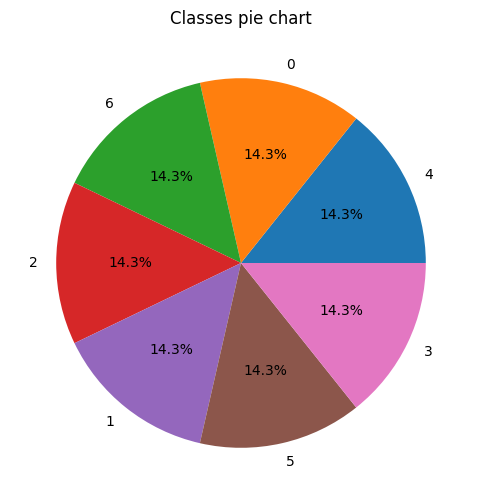

In [40]:
# Visualizing the class distribution after augmentation
# Create a figure with a size of 6x6 inches.
plt.figure(figsize=(6, 6))

# Plot a pie chart using the counts of each label.
# Display percentages on the chart with one decimal point for each slice.
plt.pie(x_aug_row['class'].value_counts().values , labels=x_aug_row['class'].value_counts().index ,autopct='%1.1f%%')
plt.title('Classes pie chart')     # Add a title to the chart: "Classes pie chart".
plt.show()     # show the chart

In [41]:
# Normalize pixel values
# Normalizing the pixel values of the training dataset (x_train_aug) by dividing by 255.0 to improve model convergence.
x_train_aug = x_train_aug / 255.0

# Normalizing the validation dataset (X_images_val) by dividing by 255.0.
X_images_val = X_images_val / 255.0

# Normalizing the test dataset (X_images_test) by dividing by 255.0.
X_images_test = X_images_test / 255.0

# Reshaping the augmented training data (x_train_aug) into a 4D array with shape (samples, height, width, channels),
# where -1 indicates an automatic adjustment to match the number of samples, 28x28 is the image size, 
# and 3 represents the color channels (RGB).
image_shape = (28, 28, 3)

x_train_aug = x_train_aug.to_numpy()  # Convert to NumPy array
x_train_aug_reshaped = x_train_aug.reshape(-1, *image_shape) # Reshape images


X_images_val_reshaped = X_images_val.reshape(-1, *image_shape)
X_images_test_reshaped = X_images_test.reshape(-1, *image_shape)

In [42]:
# Encode gender column
X_tabular_resampled = x_aug_row 
lbl = LabelEncoder()  # create object from encoding class
X_tabular_resampled['sex_encoded'] = lbl.fit_transform(X_tabular_resampled['sex'])  # apply on train data
X_tabular_val['sex_encoded'] = lbl.transform(X_tabular_val['sex'])     # apply on validation data
X_tabular_test['sex_encoded'] = lbl.transform(X_tabular_test['sex'])   # apply on test data

# Encode dx_type column
X_tabular_resampled['dx_type_encoded'] = lbl.fit_transform(X_tabular_resampled['dx_type'])  # apply on train data
X_tabular_val['dx_type_encoded'] = lbl.transform(X_tabular_val['dx_type'])      # apply on validation data
X_tabular_test['dx_type_encoded'] = lbl.transform(X_tabular_test['dx_type'])    # apply on test data

# Encode localization column
X_tabular_resampled['localization_encoded'] = lbl.fit_transform(X_tabular_resampled['localization'])  # apply on train data
X_tabular_val['localization_encoded'] = lbl.transform(X_tabular_val['localization'])      # apply on validation data
X_tabular_test['localization_encoded'] = lbl.transform(X_tabular_test['localization'])    # apply on test data

C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\2298553861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tabular_val['sex_encoded'] = lbl.transform(X_tabular_val['sex'])     # apply on validation data
C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\2298553861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tabular_test['sex_encoded'] = lbl.transform(X_tabular_test['sex'])   # apply on test data
C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\2298553861.py:10: SettingWithCopyWarning: 
A valu

In [43]:
# Scale age column using minmaxscaler
scaler = MinMaxScaler()  # create object 
X_tabular_resampled['age_scaled'] = scaler.fit_transform(X_tabular_resampled[['age']])  # apply on train data
X_tabular_val['age_scaled'] = scaler.transform(X_tabular_val[['age']])                # apply on validation data
X_tabular_test['age_scaled'] = scaler.transform(X_tabular_test[['age']])            # apply on test data

C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\437399698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tabular_val['age_scaled'] = scaler.transform(X_tabular_val[['age']])                # apply on validation data
C:\Users\swadh\AppData\Local\Temp\ipykernel_1880\437399698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tabular_test['age_scaled'] = scaler.transform(X_tabular_test[['age']])            # apply on test data


In [44]:
# Prepare tabular data by selecting relevant features from the resampled data
X_tabular_prepared_train = X_tabular_resampled[['age_scaled', 'localization_encoded','sex_encoded' , 'dx_type_encoded']].values
X_tabular_prepared_val = X_tabular_val[['age_scaled', 'localization_encoded','sex_encoded' ,'dx_type_encoded']].values
X_tabular_prepared_test = X_tabular_test[['age_scaled', 'localization_encoded','sex_encoded' ,'dx_type_encoded']].values

In [45]:
# check its shape
X_tabular_prepared_train.shape

(30037, 4)

# Model

In [70]:
# Image input branch with Convolutional layers
image_input = Input(shape= (28,28,3), name="image_input")

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)  # First Conv2D layer
x = MaxPooling2D((2, 2))(x)  # First pooling layer

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second Conv2D layer
x = MaxPooling2D((2, 2))(x)  # Second pooling layer

x = Flatten()(x)  # Flatten the features for the dense layers
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)  # Dense layer after flattening

# Tabular input branch
tabular_input = Input(shape=(4,), name="tabular_input")  # Adjust for 4 features
y = Dense(16, activation='relu')(tabular_input)  # Dense layer for tabular input

# Combine both branches
combined = Concatenate()([x, y])
z = Dense(128, activation='relu')(combined)  # Dense layer after combining
z = Dense(64, activation='softmax')(z)
z = Dense(32, activation='softmax')(z)
z = Dense(16, activation='softmax')(z)
z = Dense(7, activation='softmax')(z)  # Output layer for classification




In [71]:
# Create the model
model = Model(inputs=[image_input, tabular_input], outputs=z)

# Compile the model with the Adam optimizer and sparse categorical crossentropy loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 28, 28, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 28, 28, 32)        │             896 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 14, 14, 32)        │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 14, 14, 64)        │          18,496 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 7, 7, 64)          │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 3136)              │               0 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 64)                │         200,768 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ tabular_input (InputLayer)    │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 128)               │           8,320 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 16)                │              80 │ tabular_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 144)               │               0 │ dense_9[0][0],             │
│                               │                           │                 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 128)               │          18,560 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 64)                │           8,256 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 32)                │           2,080 │ dense_12[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 16)                │             528 │ dense_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 7)                 │             11

 Total params: 258,103 (1008.21 KB)

 Trainable params: 258,103 (1008.21 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# List of callbacks to pass to the model during training

callbacks = [                     # EarlyStopping callback to stop training when validation loss stops improving
    EarlyStopping(
        monitor='val_accuracy',        # Monitor validation loss for early stopping
        patience=15,                   # Number of epochs to wait for improvement
        restore_best_weights=True,     # Restore the model weights from the best epoch
        verbose=1
    ),
    ModelCheckpoint(          # ModelCheckpoint callback to save the model with the best validation loss
        'best_model.keras',        # Filepath to save the best model
        monitor='val_accuracy',    # Monitor the validation loss metric
        save_best_only=True,       # Save only the best model based on validation loss
        verbose=1,                 
        mode='max'              # Since we're monitoring accuracy
    ),
    ReduceLROnPlateau(     # ReduceLROnPlateau: Reduces the learning rate by a factor of 0.5 if the validation loss does not improve for 5 epochs.
        monitor='val_loss',
        factor=0.5,             # Less aggressive reduction
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

In [ ]:
# train the model
history = model.fit(
    [x_train_aug_reshaped, X_tabular_prepared_train], y_train_aug,
    validation_data=([X_images_val_reshaped , X_tabular_prepared_val], y_val),
    epochs=50,
    batch_size=32,
    callbacks = callbacks

)

Epoch 1/50
936/939 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7582 - loss: 0.6718
Epoch 1: val_accuracy did not improve from 0.72551
939/939 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7576 - loss: 0.6737 - val_accuracy: 0.7105 - val_loss: 0.8681 - learning_rate: 3.9063e-06
Epoch 2/50
935/939 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7530 - loss: 0.6840
Epoch 2: val_accuracy did not improve from 0.72551
939/939 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7571 - loss: 0.6732 - val_accuracy: 0.7137 - val_loss: 0.8657 - learning_rate: 3.9063e-06
Epoch 3/50
938/939 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7552 - loss: 0.6779
Epoch 3: val_accuracy did not improve from 0.72551
939/939 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7572 - loss: 0.6729 - val_accuracy: 0.7155 - val_loss: 0.8655 - learning_rate: 3.9063e-06
Epoch 4/50
937/939 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7588 - loss: 0.6676
Epoch 4: val_accuracy did not improve from 0.72551
939/939 ━━━━━━

# Evaluation

In [75]:
# print model accurices on train & validation & test
train_score = model.evaluate([x_train_aug_reshaped, X_tabular_prepared_train], y_train_aug, verbose=1)
val_score = model.evaluate([X_images_val_reshaped , X_tabular_prepared_val], y_val, verbose=1)
test_score = model.evaluate([X_images_test_reshaped , X_tabular_prepared_test], y_test, verbose=1)

print("\nFinal Results:")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Validation Accuracy: {val_score[1]*100:.2f}%")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


939/939 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7581 - loss: 0.6738
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 0.8656
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7089 - loss: 0.8928

Final Results:
Train Accuracy: 75.81%
Validation Accuracy: 71.68%
Test Accuracy: 70.89%


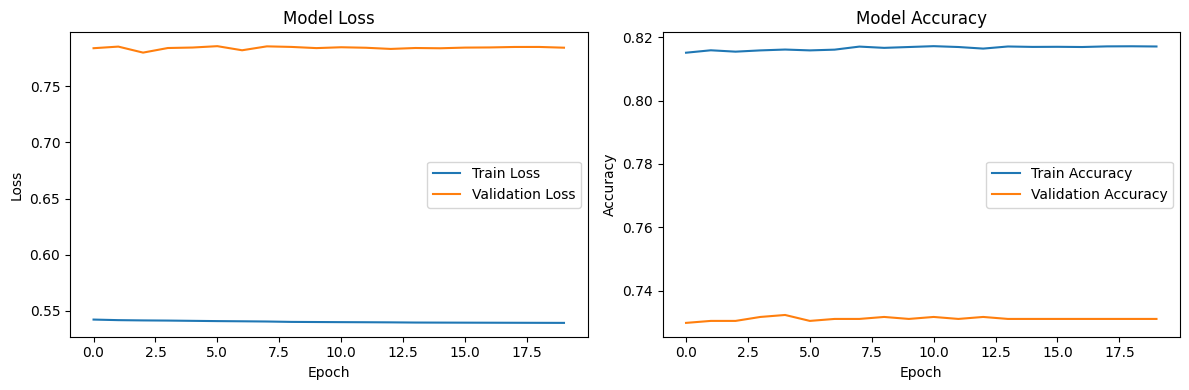

In [153]:
# show loss & accuracy plot
plt.figure(figsize=(12, 4))

# Display the loss curve over the epochs.
plt.subplot(1, 2, 1)   # Creating the first subplot
plt.plot(history.history['loss'], label='Train Loss')   # Plotting the training loss
plt.plot(history.history['val_loss'], label='Validation Loss')    # Plotting the validation loss
plt.title('Model Loss')     # Adding a title to the loss plot
plt.xlabel('Epoch')      # Label for the x-axis (epochs)
plt.ylabel('Loss')       # Label for the y-axis (loss value)
plt.legend()           # Displaying the legend to differentiate the curves

# Display the accuracy curve over the epochs.
plt.subplot(1, 2, 2)      # Creating the second subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')     # Plotting the training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')    # Plotting the validation accuracy
plt.title('Model Accuracy')     # Adding a title to the accuracy plot
plt.xlabel('Epoch')         # Label for the x-axis (epochs)
plt.ylabel('Accuracy')      # Label for the y-axis (accuracy percentage)
plt.legend()        # Displaying the legend to differentiate the curves

# Adjusting the layout to ensure that the subplots do not overlap and are well-spaced.
plt.tight_layout()
plt.show()     # Displaying the plots.

In [83]:
# save the model
model.save('truetrue_model.h5')  # Save the model in HDF5 format


In [85]:
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = r"C:\Users\swadh\OneDrive\Pictures\OneDrive\Desktop\skin cancer web\Skin_Cancer_Classification_Web_Using_DeepLearning-master\model.h5"

# Load the model
model = load_model(model_path)

# Example prediction
predictions = model.predict([X_images_test_reshaped , X_tabular_prepared_test])
pred_labels = np.argmax(predictions, axis=1)



63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [86]:
# print classification report
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.30      0.25      0.27        65
           1       0.50      0.52      0.51       103
           2       0.50      0.55      0.52       220
           3       0.34      0.57      0.43        23
           4       0.95      0.81      0.87      1341
           5       0.55      0.82      0.66        28
           6       0.38      0.65      0.48       223

    accuracy                           0.73      2003
   macro avg       0.50      0.59      0.53      2003
weighted avg       0.78      0.73      0.75      2003



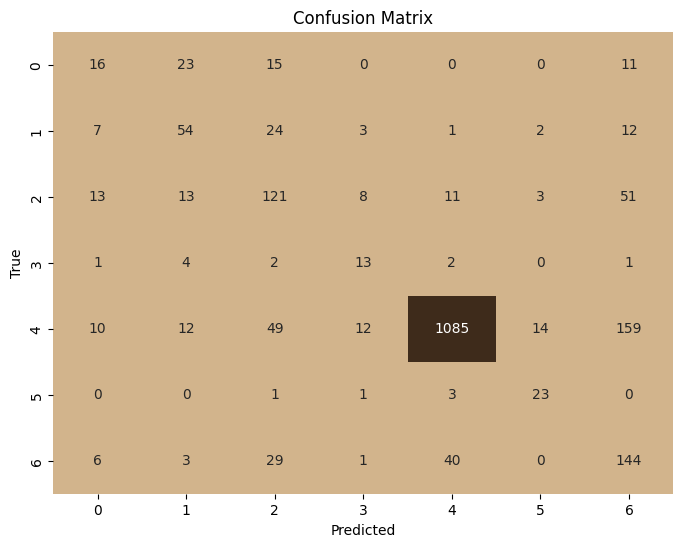

In [87]:
# show confusion matrix
beige_brown_palette = ["#D2B48C", "#C2B280", "#8B4513", "#6F4F28", "#3E2B1B"]

# Generating the confusion matrix by comparing the true labels (y_test) and the predicted labels (pred_labels).
cm = confusion_matrix(y_test, pred_labels)

# Defining a custom colormap using the previously defined beige and brown color palette.
cmap = ListedColormap(beige_brown_palette) 

# Creating the confusion matrix heatmap That is customized with the following properties:
# annot=True: displays the numbers inside the heatmap cells.
# fmt="d": formats the annotations as integers.
# cmap=beige_brown_palette: applies the custom color palette.
# cbar=False: removes the color bar.
# 'xticklabels' and 'yticklabels': set the x and y axis labels to the class labels.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Precision:**
precision measure the accuracy of positive predictions.it tells us, of all the cases the model predicted as positive, how many are actualy positive

**Recall:**
Recall measures how well the model detects positive cases. It tells us, of all the actual positive cases, how many were correctly predicted by the model.

**F1_Score:**
F1-Score is the harmonic mean of precision and recall. It is a balanced metric that considers both precision and recall.

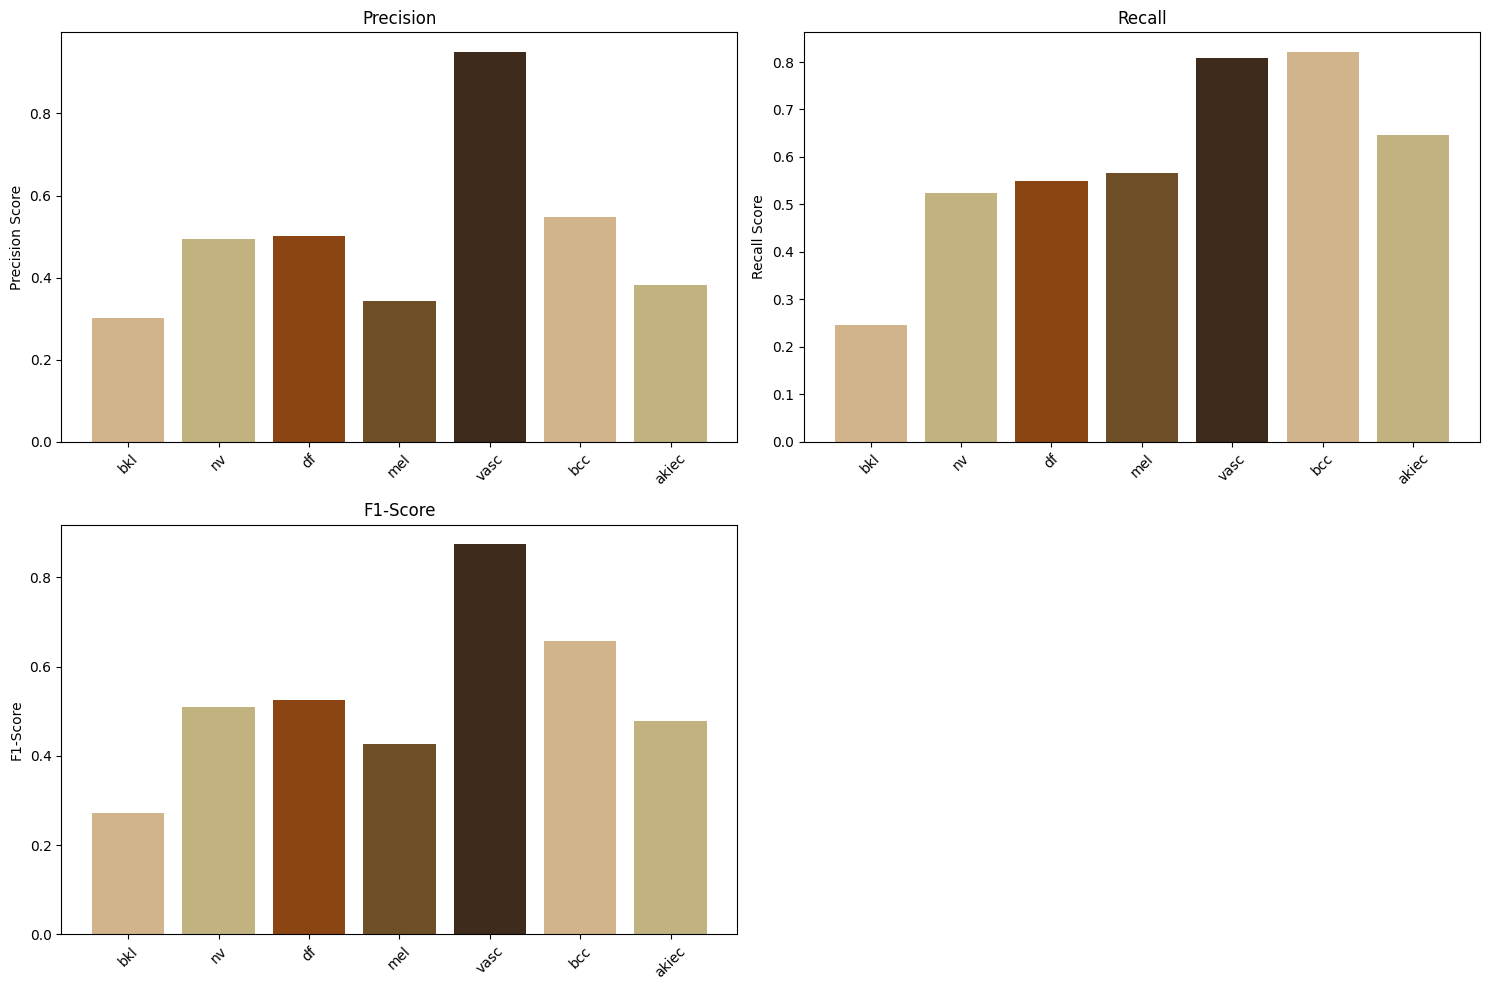

In [88]:
# Define a color palette using a list of color codes, which will be used to color the bars in the plots.
beige_brown_palette = ["#D2B48C", "#C2B280", "#8B4513", "#6F4F28", "#3E2B1B"]

# Extract the unique class labels from the 'dx' column of the DataFrame.
class_labels = df['dx'].unique()

# Calculate precision, recall, and F1-score for each class using the true and predicted labels.
# The 'average=None' argument to return scores for each class separately.
precision = precision_score(y_test, pred_labels, average=None)
recall = recall_score(y_test, pred_labels, average=None)
f1 = f1_score(y_test, pred_labels, average=None)

# Create a 2x2 grid of subplots to visualize the performance metrics.
# The figsize argument controls the size of the figure.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the precision scores for each class.
axes[0, 0].bar(class_labels, precision, color=beige_brown_palette[:len(class_labels)])
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot the recall scores for each class.
axes[0, 1].bar(class_labels, recall, color=beige_brown_palette[:len(class_labels)])
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the F1-scores for each class.
axes[1, 0].bar(class_labels, f1, color=beige_brown_palette[:len(class_labels)])
axes[1, 0].set_title('F1-Score')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Hide the last subplot (bottom-right corner).
axes[1, 1].axis('off')

# Adjust the layout to ensure proper spacing between plots.
plt.tight_layout()
plt.show()
